In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Basic plotting
Basic plotting using pandas

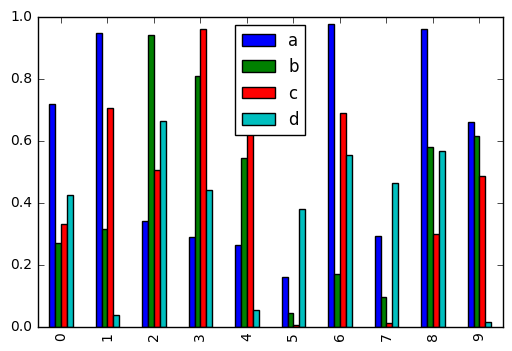

In [3]:
# Plotting multiple bar charts as one plot
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

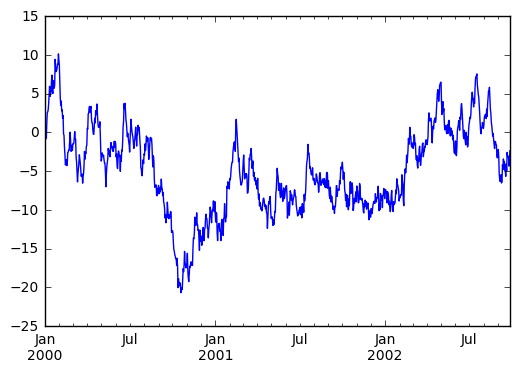

In [2]:
np.random.seed(12345)

ts = pd.Series(np.random.randn(1000),index=pd.date_range('2000-1-1',periods=1000))
ts = ts.cumsum()
ts.plot()

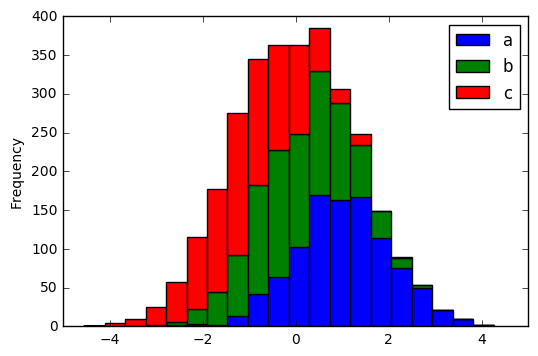

In [4]:
# Plotting histograms overlayed
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1,
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1},
                    columns=['a', 'b', 'c'])
plt.figure();
df4.plot.hist(stacked=True, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1156b7c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115ada080>]], dtype=object)

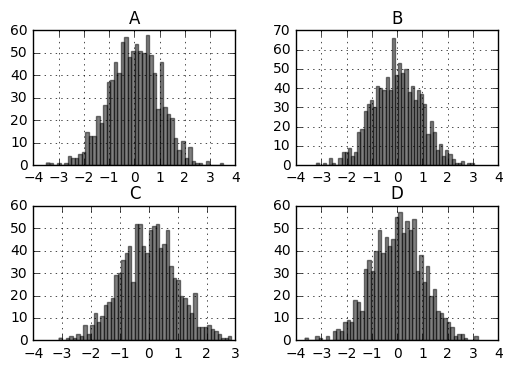

In [5]:
# Plotting multiple histograms
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

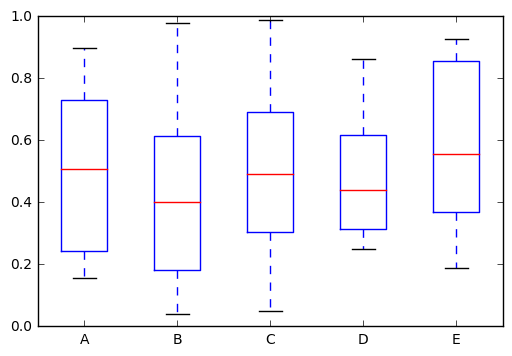

In [6]:
# Box plots
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

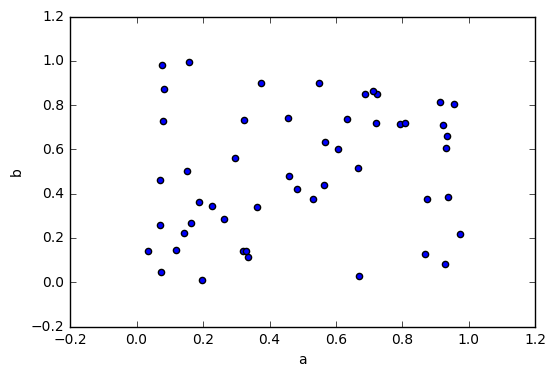

In [7]:
# Basic scatterplot
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

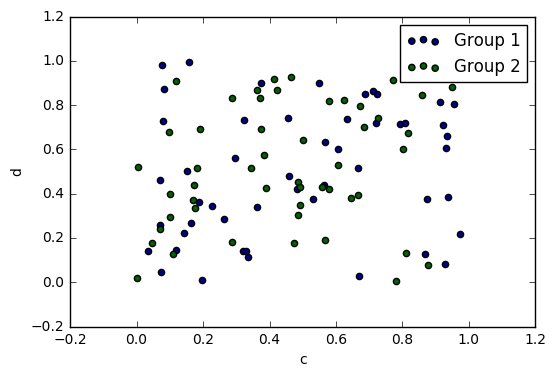

In [8]:
# Plotting multiple scatterplots in one plot
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

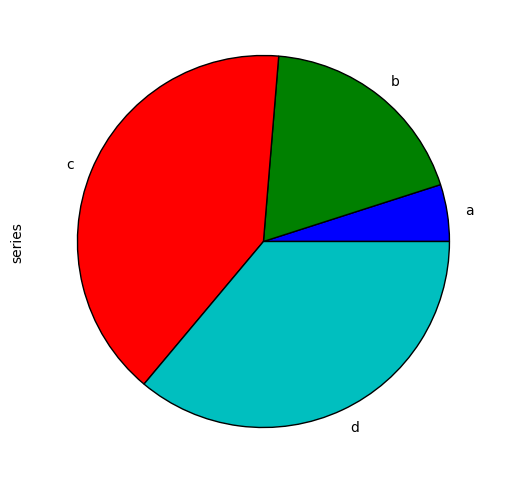

In [9]:
# Pie chart
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11775b780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1177a9048>], dtype=object)

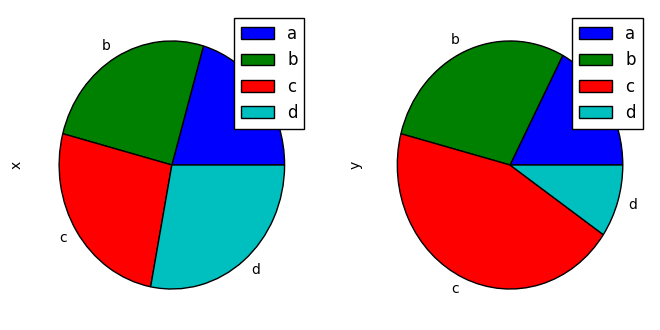

In [12]:
# Multiple pie plots
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

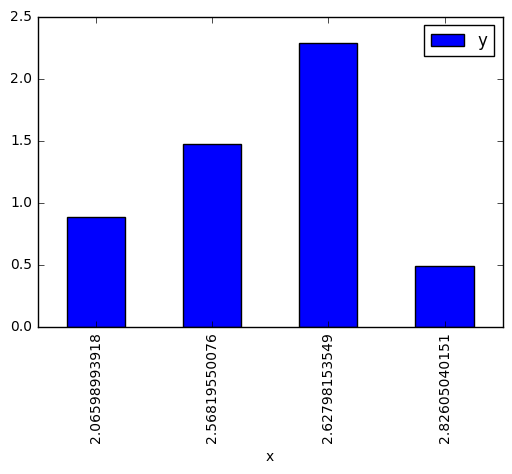

In [13]:
# Bar chart
df.plot.bar(x='x',y='y')

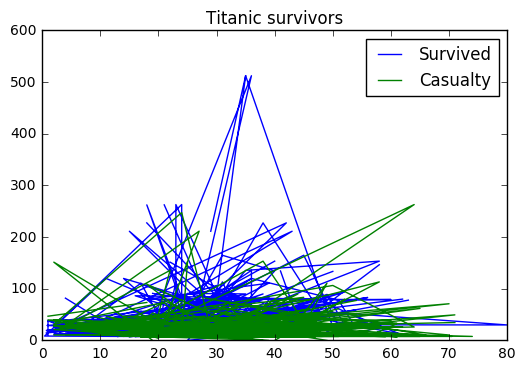

In [20]:
# Plotting titanic survivors vs non-survivors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
titanic = pd.read_csv('titanic/train.csv')
survivors = titanic[titanic['Survived']==True]
casualties = titanic[titanic['Survived'] == False]

# Plot age vs fare for both
fig,ax = plt.subplots()
ax.plot(survivors['Age'], survivors['Fare'],c='blue',label="Survived")
ax.plot(casualties['Age'], casualties['Fare'],c='green',label="Casualty")
plt.legend(loc='upper right')
plt.title('Titanic survivors')
plt.show()

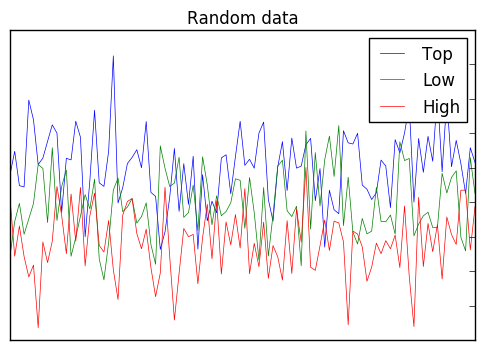

In [40]:
# Fancier plot where we turn off tick marks and other "noise"
np.random.seed(12345)

fancy = pd.DataFrame({'Top': np.random.randn(100) + 1,
                    'Low': np.random.randn(100),
                    'High': np.random.randn(100) - 1},
                    columns=['Top', 'Low', 'High'],
                    index=pd.date_range('2000-1-1',periods=100))

ax = fancy.plot(linewidth=0.5)

# Remove labels completely
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

# Remove labels
#ax.set_yticklabels([])
#ax.set_xticklabels([])

# Remove ticks for x-axis
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

# Remove ticks for y-axis
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off

map(lambda spine:spine.set_visible(False),ax.spines)
plt.legend(loc='upper right')
plt.title('Random data')
plt.show()

/Users/trulsu/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


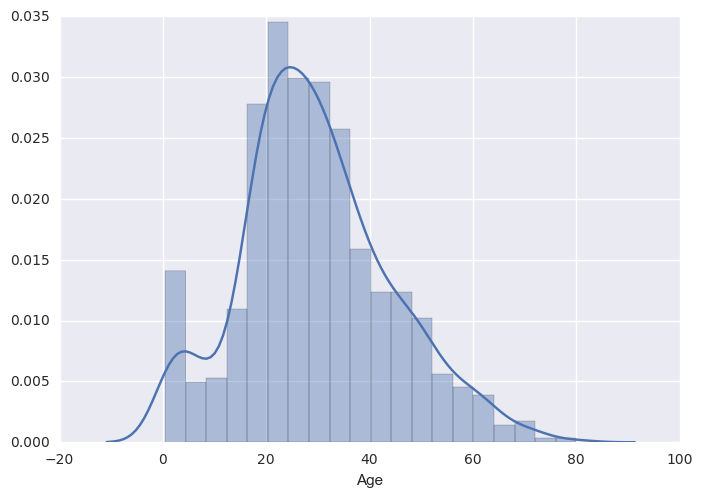

In [42]:
# Seaborn - a library for pretty plotting
import seaborn as sns
import matplotlib.pyplot as plt
data = titanic['Age'].dropna()
sns.distplot(data)
plt.show()

### Seaborn styles
sns.set_style('style')

|         | coordinate grid | background color | ticks   |
|---------|-----------------|------------------|---------|
|darkgrid | displayed       | dark             |         |
|whitegrid| displayed       | white            |         |
|dark     | hidden          | dark             |         |
|white    | hidden          | white            |         |
|ticks    | hidden          | white            | visible |

To remove axis spines for the top and right axes: sns.despine()
You can also set 'left' and 'bottom' to remove these.


/Users/trulsu/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


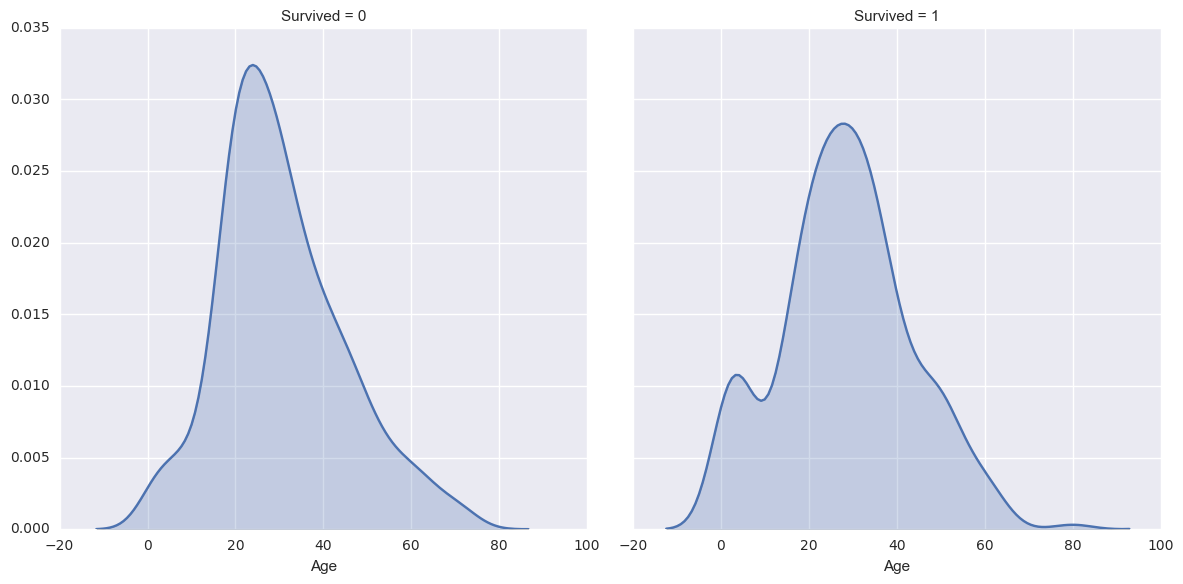

In [45]:
# Facet grid
g = sns.FacetGrid(titanic,col='Survived',size=6) # Condition on survived
g.map(sns.kdeplot,'Age',shade=True) # For each unique value in Survived, plot the age
sns.despine(left=True,bottom=True)
plt.show()

/Users/trulsu/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


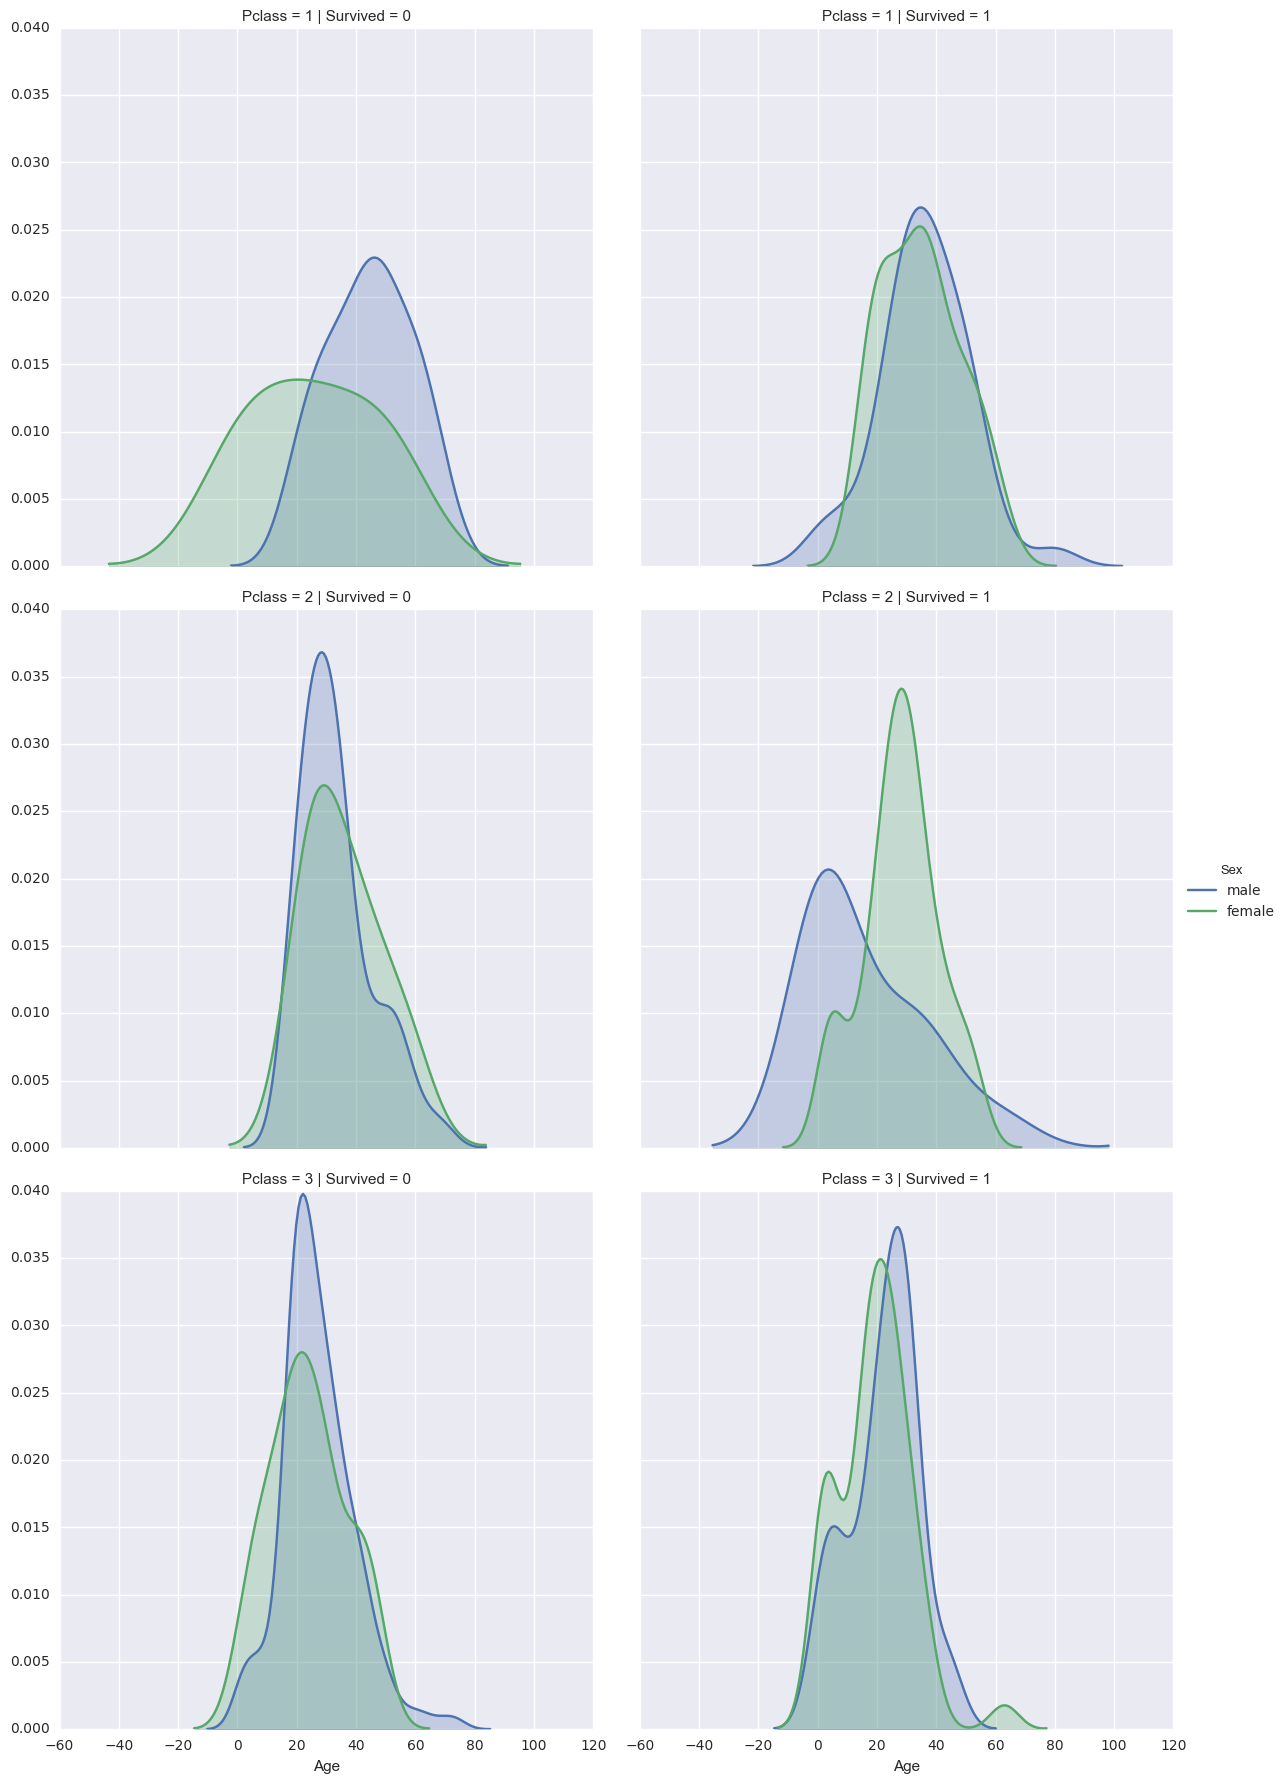

In [47]:
# Facet grid - with three parameters
g = sns.FacetGrid(titanic,col='Survived',row='Pclass', hue='Sex',size=6) # Condition on survived
g.map(sns.kdeplot,'Age',shade=True).add_legend() # For each unique value in Survived, plot the age
sns.despine(left=True,bottom=True)
plt.show()

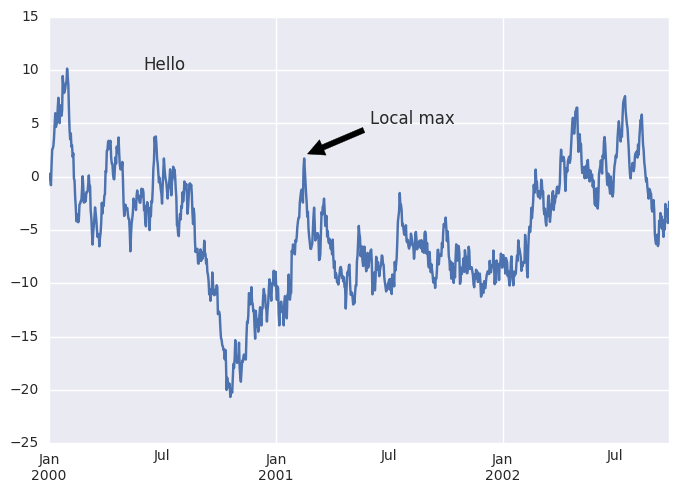

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Notes and annotations
np.random.seed(12345)

ts = pd.Series(np.random.randn(1000),index=pd.date_range('2000-1-1',periods=1000))
ts = ts.cumsum()
ts.plot()
plt.text(dt.date(2000,6,1),10,'Hello') # Simple text
plt.annotate('Local max',xy=(dt.datetime(2001,2,15),2),xytext=(dt.datetime(2001,6,1),5),
            arrowprops=dict(facecolor='black',shrink=0.05))

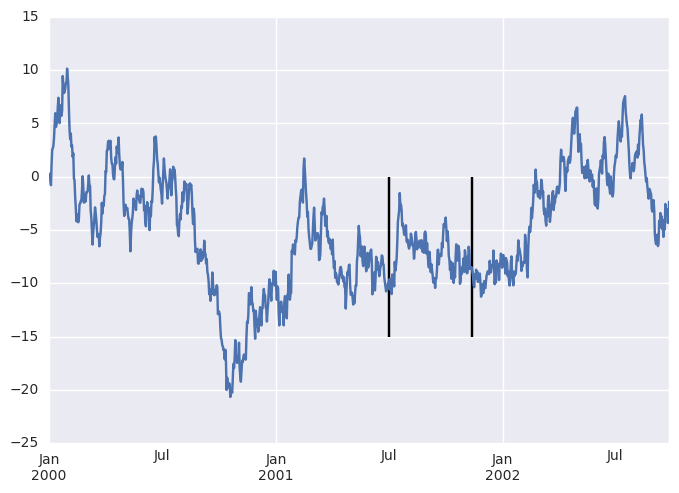

In [63]:
# Plotting vertical lines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Notes and annotations
np.random.seed(12345)

ts = pd.Series(np.random.randn(1000),index=pd.date_range('2000-1-1',periods=1000))
ts = ts.cumsum()
ts.plot()
plt.vlines([dt.datetime(2001,11,12),dt.datetime(2001,7,1)], ymin=-15,ymax=0)